# Задание 1
Использовать метод наименьших квадратов с помощью SVD-разложения, QR разложения или нормальной системы. Построить график решения

## Теория

### Введение
Рассмотрим линейную модель. Пусть $y(t)$ интересующая нас функция, зависящая от какого-то параметра t. Мы хотим аппроксимировать эту функцию набором других известных нам функций $\phi(t)$ так, что:
$$y(t)\sim \beta_1\phi_1(t)+\cdots+\beta_n\phi_n(t).$$
Пусть у нас есть набор данных $X$ таких, что:
$$x_{i,j} = \phi_j(t_i),$$
тогда нашу модель можно переписать в матричном виде:
$$X\beta\sim y.$$

### Метод наименьших квадратов
Метод наименьших квадратов предлагает нам минимизировать ошибку предсказания в смысле квадратичной нормы:
$$\min\limits_\beta ||X\beta-y||_2^2=\min\limits_\beta\sum_{i=1}^mr_i^2,$$
где $r = X\beta-y$.
Прямо методами линейной алгебры такая задача не решается, так как наборов наблюдений обычно больше, чем переменных, задача ''переопределена''. Можно умножить уравнение выше на матрицу $X^T$ и получить:
$$X^TX\beta=X^Ty.$$
При определенных предположениях матрица $X^TX$ обратима, и тогда:
$$\beta = \left(X^TX\right)^{-1}X^Ty.$$
Данное решение является максимизацией функции правдоподобия в предположении, что ошибки распределены нормально.

### QR разложение
Суть данного метода заключается в факторизации матрицы $X$ и представлении её в виде:
$$X=QR,$$
где матрица $Q$ ортогональна, матрица $R$ верхне-право-треугольная. Само преобразование заключается в использовании набора матриц $H_n,\cdots,H_2,H_1$ таких, что:
$$H_n\cdots H_2H_1X=R,Q = (H_n\cdots H_2H_1)^T$$
и, следовательно, система описанная выше принимает вид:
$$X\beta\sim y \Rightarrow R\beta\sim z,$$
где $z = H_n\cdots H_2H_1y.$
Заметим, что матрица $Q$ ортогональна, а значит:
$$X\beta=y \Rightarrow QR\beta=y \Rightarrow R\beta = Q^Ty$$
Так как матрица $R$ диагональна, параметры $\beta$ удается найти, просто решив систему уравнений. (либо если $R$ обратима, можно умножить слева на обратную)

### SVD разложение
Тут достаточно сложная теория, но если очень кратко: находим псевдообратную матрицу $X$ через SVD разложение самой матрицы $X$:
$$X = USV^T$$
$$X^\dagger = VS^\dagger U^T,$$
где $S^\dagger$ состоит из обратных коэффициентов матрицы $S$. Представляем всю проблему в виде:
$$\beta=X^\dagger y$$
Подробнее можно почитать, например, тут: https://inst.eecs.berkeley.edu/~ee127/sp21/livebook/l_svd_lineqs.html

## Код

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Набор данных

In [2]:
num_dots = 15

In [3]:
x_space = np.linspace(0, 3, num_dots)
noise = np.random.normal(0,5,num_dots)
y = 6 + 7*x_space + 3*x_space**2 - 2*(x_space**3) + noise
beta = np.array([3,2,5,1/2])
X = np.array([[1,x,x**2,x**3] for x in x_space])
print(f'data {X = }')
print(f'data {y = }')
print(f'parameters {beta = }')

data X = array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 2.14285714e-01, 4.59183673e-02, 9.83965015e-03],
       [1.00000000e+00, 4.28571429e-01, 1.83673469e-01, 7.87172012e-02],
       [1.00000000e+00, 6.42857143e-01, 4.13265306e-01, 2.65670554e-01],
       [1.00000000e+00, 8.57142857e-01, 7.34693878e-01, 6.29737609e-01],
       [1.00000000e+00, 1.07142857e+00, 1.14795918e+00, 1.22995627e+00],
       [1.00000000e+00, 1.28571429e+00, 1.65306122e+00, 2.12536443e+00],
       [1.00000000e+00, 1.50000000e+00, 2.25000000e+00, 3.37500000e+00],
       [1.00000000e+00, 1.71428571e+00, 2.93877551e+00, 5.03790087e+00],
       [1.00000000e+00, 1.92857143e+00, 3.71938776e+00, 7.17310496e+00],
       [1.00000000e+00, 2.14285714e+00, 4.59183673e+00, 9.83965015e+00],
       [1.00000000e+00, 2.35714286e+00, 5.55612245e+00, 1.30965743e+01],
       [1.00000000e+00, 2.57142857e+00, 6.61224490e+00, 1.70029155e+01],
       [1.00000000e+00, 2.78571429e+00, 7.

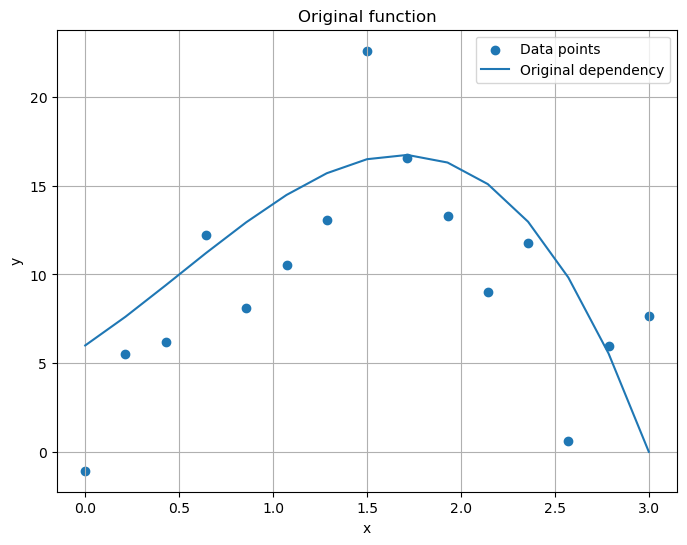

In [4]:
fig, ax = plt.subplots(1,1,figsize=(8,6))
ax.scatter(x_space,y,label = 'Data points')
ax.plot(x_space,y-noise,label = 'Original dependency')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title("Original function")
ax.grid()
ax.legend()
plt.show()

### SVD разложение

In [5]:
U, S_values, V = np.linalg.svd(X) # U[num_dots][num_dots], S[num_dots][4] (S_values is a vector of eigenvalues), V.T[4][4] (V is already transposed!)

In [6]:
S = np.pad(np.diag(S_values), ((0,U.shape[0]-S_values.shape[0]),(0,V.shape[0]-S_values.shape[0])), mode = 'constant', constant_values=0)
S.shape

(15, 4)

In [7]:
np.matmul(np.matmul(U, S), V) # Verifying

array([[1.00000000e+00, 4.46864767e-15, 3.20576898e-15, 6.42888520e-15],
       [1.00000000e+00, 2.14285714e-01, 4.59183673e-02, 9.83965015e-03],
       [1.00000000e+00, 4.28571429e-01, 1.83673469e-01, 7.87172012e-02],
       [1.00000000e+00, 6.42857143e-01, 4.13265306e-01, 2.65670554e-01],
       [1.00000000e+00, 8.57142857e-01, 7.34693878e-01, 6.29737609e-01],
       [1.00000000e+00, 1.07142857e+00, 1.14795918e+00, 1.22995627e+00],
       [1.00000000e+00, 1.28571429e+00, 1.65306122e+00, 2.12536443e+00],
       [1.00000000e+00, 1.50000000e+00, 2.25000000e+00, 3.37500000e+00],
       [1.00000000e+00, 1.71428571e+00, 2.93877551e+00, 5.03790087e+00],
       [1.00000000e+00, 1.92857143e+00, 3.71938776e+00, 7.17310496e+00],
       [1.00000000e+00, 2.14285714e+00, 4.59183673e+00, 9.83965015e+00],
       [1.00000000e+00, 2.35714286e+00, 5.55612245e+00, 1.30965743e+01],
       [1.00000000e+00, 2.57142857e+00, 6.61224490e+00, 1.70029155e+01],
       [1.00000000e+00, 2.78571429e+00, 7.76020408e

In [8]:
S_dagger = np.pad(np.diag(1/S_values), ((0,U.shape[0]-S_values.shape[0]),(0,V.shape[0]-S_values.shape[0])), mode = 'constant', constant_values=0).T
S.shape, S_dagger.shape

((15, 4), (4, 15))

In [9]:
X_dagger = np.matmul(np.matmul(V.T, S_dagger), U.T)
X_dagger, X_dagger.shape

(array([[ 6.72875817e-01,  3.73856209e-01,  1.58169935e-01,
          1.43790850e-02, -6.89542484e-02, -1.03267974e-01,
         -1.00000000e-01, -7.05882353e-02, -2.64705882e-02,
          2.09150327e-02,  6.01307190e-02,  7.97385621e-02,
          6.83006536e-02,  1.43790850e-02, -9.34640523e-02],
        [-1.60766158e+00, -5.18881627e-01,  2.05058377e-01,
          6.19686051e-01,  7.80529021e-01,  7.43114910e-01,
          5.62971342e-01,  2.95625943e-01, -3.39366516e-03,
         -2.78559857e-01, -4.74345009e-01, -5.35221496e-01,
         -4.05661695e-01, -3.01379811e-02,  6.46877269e-01],
        [ 1.03195352e+00,  2.16049383e-01, -3.01882576e-01,
         -5.69744707e-01, -6.35439361e-01, -5.46868890e-01,
         -3.51935646e-01, -9.85419809e-02,  1.65409754e-01,
          3.92017206e-01,  5.33378024e-01,  5.41589855e-01,
          3.68750349e-01, -3.30428468e-02, -7.11692084e-01],
        [-1.93738401e-01, -2.76769144e-02,  7.45147695e-02,
          1.23481618e-01,  1.29868598

In [10]:
beta_predicted_svd = np.matmul(X_dagger, y)
beta_predicted_svd

array([ -1.32556124,  26.14073589, -12.8132009 ,   1.57697328])

In [11]:
y_predicted_svd = np.matmul(X, beta_predicted_svd)

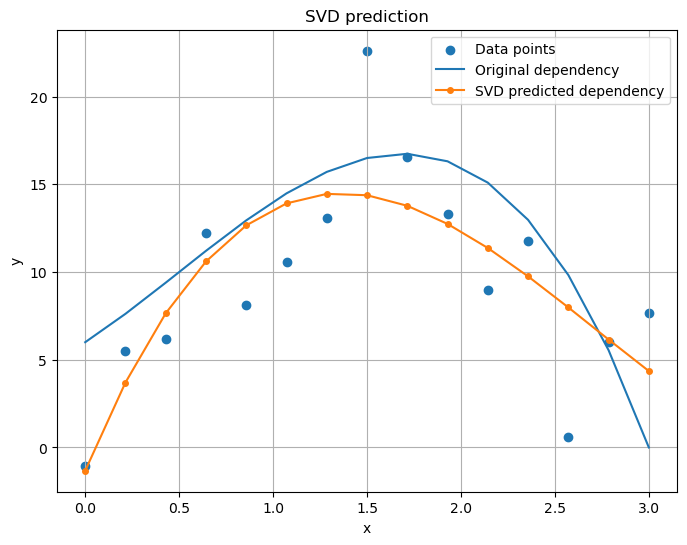

In [12]:
fig, ax = plt.subplots(1,1,figsize=(8,6))
ax.scatter(x_space,y,label = 'Data points')
ax.plot(x_space,y-noise,label = 'Original dependency')
ax.plot(x_space,y_predicted_svd,label = 'SVD predicted dependency', marker='o', markersize=4)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title("SVD prediction")
ax.grid()
ax.legend()
plt.show()

### QR разложение

In [13]:
q, r = np.linalg.qr(X)
q.shape, r.shape

((15, 4), (4, 4))

In [14]:
r

array([[ -3.87298335,  -5.80947502, -12.03391254, -28.00996884],
       [  0.        ,   3.58568583,  10.75705748,  29.70265056],
       [  0.        ,   0.        ,   2.9492797 ,  13.27175863],
       [  0.        ,   0.        ,   0.        ,  -2.35501291]])

In [15]:
beta_predicted_qr = np.matmul(np.matmul(np.linalg.inv(r), q.T), y)
beta_predicted_qr

array([ -1.32556124,  26.14073589, -12.8132009 ,   1.57697328])

In [16]:
y_predicted_qr = np.matmul(X, beta_predicted_qr)

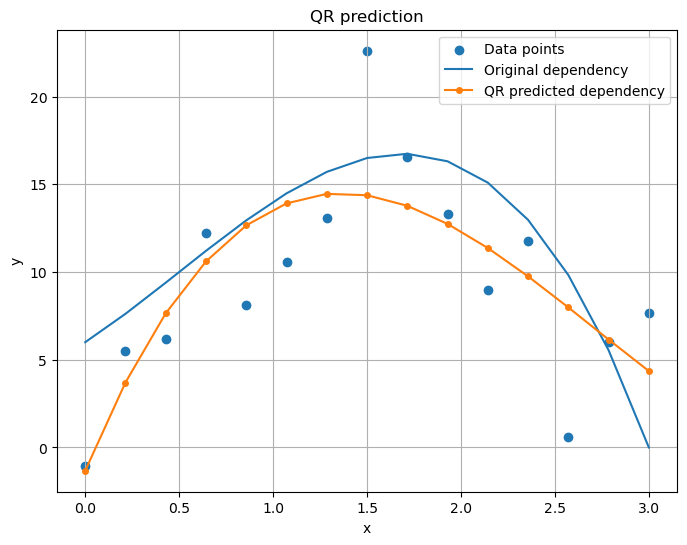

In [17]:
fig, ax = plt.subplots(1,1,figsize=(8,6))
ax.scatter(x_space,y,label = 'Data points')
ax.plot(x_space,y-noise,label = 'Original dependency')
ax.plot(x_space,y_predicted_qr,label = 'QR predicted dependency', marker='o', markersize=4)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title("QR prediction")
ax.grid()
ax.legend()
plt.show()

### Разложение МНК

In [18]:
beta_predicted_lms = np.matmul(np.matmul(np.linalg.inv(np.matmul(X.T, X)), X.T), y)
beta_predicted_lms

array([ -1.32556124,  26.14073589, -12.8132009 ,   1.57697328])

In [19]:
y_predicted_lms = np.matmul(X, beta_predicted_lms)

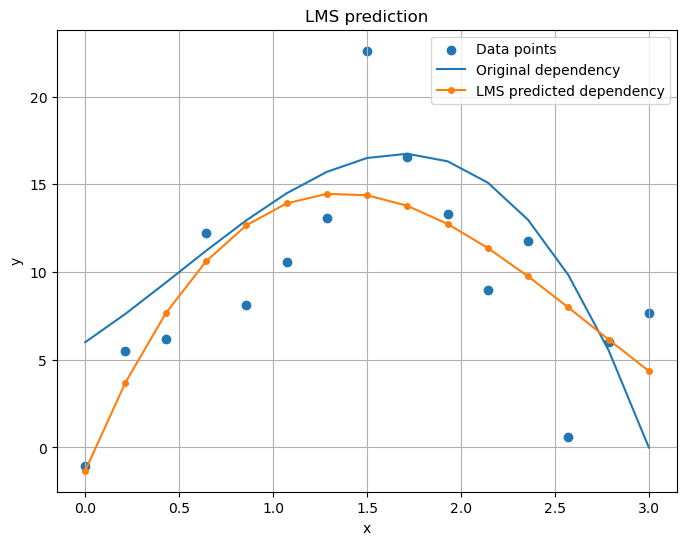

In [20]:
fig, ax = plt.subplots(1,1,figsize=(8,6))
ax.scatter(x_space,y,label = 'Data points')
ax.plot(x_space,y-noise,label = 'Original dependency')
ax.plot(x_space,y_predicted_lms,label = 'LMS predicted dependency', marker='o', markersize=4)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title("LMS prediction")
ax.grid()
ax.legend()
plt.show()

### checking all the weights

In [21]:
print(f'{beta=}')
print(f'{beta_predicted_svd=}')
print(f'{beta_predicted_qr=}')
print(f'{beta_predicted_lms=}')

beta=array([3. , 2. , 5. , 0.5])
beta_predicted_svd=array([ -1.32556124,  26.14073589, -12.8132009 ,   1.57697328])
beta_predicted_qr=array([ -1.32556124,  26.14073589, -12.8132009 ,   1.57697328])
beta_predicted_lms=array([ -1.32556124,  26.14073589, -12.8132009 ,   1.57697328])
